# Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.



## Goal

In this project, you will find insights from the data by using **pandas** to analyze and manipulate the data and **matplotlib** and **seaborn** for data visualization. In the end I'll be applying a logistic regression model to predict which passengers are more likely to survive in a separate test set. 

References
https://www.kaggle.com/vinothan/titanic-model-with-90-accuracy

Best one :
https://datascienceplus.com/logistic-regression-with-python-using-titanic-data/

In [ ]:
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# load data
titanic = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Description of the data set
Here's a brief description of each column in the data.

- PassengerID: A column added by Kaggle to identify each row and make submissions easier
- Survived: Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- Pclass: The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- Sex: The passenger's sex
- Age: The passenger's age in years
- SibSp: The number of siblings or spouses the passenger had aboard the Titanic
- Parch: The number of parents or children the passenger had aboard the Titanic
- Ticket: The passenger's ticket number
- Fare: The fare the passenger paid
- Cabin: The passenger's cabin number
- Embarked: The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [ ]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Van Impe, Mr. Jean Baptiste",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### **Finding the number of missing values for each column.**
The first step in data analysis is to identify columns with missing data. Can you find the columns in this data with missing value as well as the number of records with missing value for each column?  

Hint: you will need [isna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isna.html) function.

In [ ]:
# TODO
titanic.isna().sum()
# Answer - 3 columns have missing values,
#Age has 177 missing values, Cabin has 687 missing values and Embarked has 2 missing values.


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### **Impute missing values.**
Now we've identified the following columns with missing values: _Age_, _Cabin_ and _Embarked_. As the next step, we want to impute those missing values. There are three ways to impute the missing values:
- A constant value that has meaning within the domain.
- The mean, median or mode value based on non-missing values of that column.
- A random value drawn from other non-missing values of that column.

Please write code to impute the missing values as follows:
- the missing values of column _age_ with the mean of that column.
- the missing values of column _Cabin_ with a constant value 'other'.
- the missing values of column _Embarked_ with the [mode](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html) of that column.

In [ ]:
# TODO
age_mean = titanic['Age'].mean(skipna=True) 
titanic['Age'] = titanic['Age'].fillna(age_mean)
titanic['Cabin'] = titanic['Cabin'].fillna('other')
#mode

embarked_mode = titanic['Embarked'].mode()[0]
titanic['Embarked'] = titanic['Embarked'].fillna(embarked_mode) #check again
titanic.isna().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### **What's the name of the person who has the 16th most expensive ticket?**

In [ ]:
# There are 2 approaches to this question

#Approach 1 - There is an overlap in Fare column, as many people have the same fare
#Hence, I created a dataframe with Name and Frame and grouped according to Fare and then sorted them
# and found the names of people who have the 16th most expensive ticket.

titanic_sort = titanic[['Name' , 'Fare' ]]
titanic_sort=titanic_sort.groupby('Fare').sum().sort_values('Fare', ascending= False)
names = titanic_sort['Name'].iloc[15]
print("Names of the person with 16th most expensive ticket when grouped by Fare are:\n{} ".format(names) )

#Approach 2 - To simply sort the values without groupby and find the name of person with 16th most expensive ticket
titanic_sort = titanic[['Name' , 'Fare' ]]
titanic_sort = titanic_sort.sort_values('Fare', ascending= False)
names = titanic_sort['Name'].iloc[15]
print("\nName of the person with 16th most expensive ticket w/o grouping is:\n{} ".format(names) )

Names of the person with 16th most expensive ticket when grouped by Fare are:
Carter, Mr. William ErnestCarter, Miss. Lucile PolkCarter, Mrs. William Ernest (Lucile Polk)Carter, Master. William Thornton II 

Name of the person with 16th most expensive ticket w/o grouping is:
Farthing, Mr. John 


### **Out of all the remales who survived, what's the name who has the 6th most expensive ticket?**

In [ ]:
# Again 2 approaches
#Approach 1
titanic_sf = titanic.loc[(titanic['Survived'] == 1) & (titanic['Sex'] == 'female') , ['Name' , 'Fare' ]]
#Sorting & group by fare
titanic_sort_sf=titanic_sf.groupby('Fare').sum().sort_values('Fare', ascending= False)
names = titanic_sort_sf['Name'].iloc[5]
print("Names of the person with 6th most expensive ticket are with grouping by fare:\n{} ".format(names) )

#Approach 2
titanic_sf = titanic.loc[(titanic['Survived'] == 1) & (titanic['Sex'] == 'female') , ['Name' , 'Fare' ]]
#sorting
titanic_sort_sf=titanic_sf.sort_values('Fare', ascending= False)
names = titanic_sort_sf['Name'].iloc[5]
print("\nNames of the person with 6th most expensive ticket are w/o grouping:\n{} ".format(names) )


Names of the person with 6th most expensive ticket are with grouping by fare:
Madill, Miss. Georgette AlexandraAllen, Miss. Elisabeth WaltonRobert, Mrs. Edward Scott (Elisabeth Walton McMillan) 

Names of the person with 6th most expensive ticket are w/o grouping:
Baxter, Mrs. James (Helene DeLaudeniere Chaput) 


### **Examine the survival rate**
Calculate the survival rate for different gender and Pclass combination and use a couple of sentences to describe your findings. Hint: pivot_table is your friend.

In [ ]:
# TODO
titanic_new = titanic.drop(columns='PassengerId')

titanic_new.pivot_table(values = ['Survived'] ,index=['Sex'], columns = 'Pclass', margins = True)
#Survival rate of female in 1st class is the highest,
# followed by 2nd Pclass females and then 3rd Pclass females
# This shows that females were first given preference in terms of rescuing over men.
#We can also observe that Survival rate of both Females and Males are highest in PClass 1 and then followed by Pclass2 and Pclass 3
#Hence, we can say that passengers in PClass 1 were given more attention and preference for rescuing.

Survived                              
Pclass         1         2         3       All
Sex                                           
female  0.968085  0.921053  0.500000  0.742038
male    0.368852  0.157407  0.135447  0.188908
All     0.629630  0.472826  0.242363  0.383838

### **Is Age or Fare an important factor to one's chance of survival?**
Visualize the distribution of Column _Age_ for both survived and non-survived population and write down your findings based on the visualization.

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

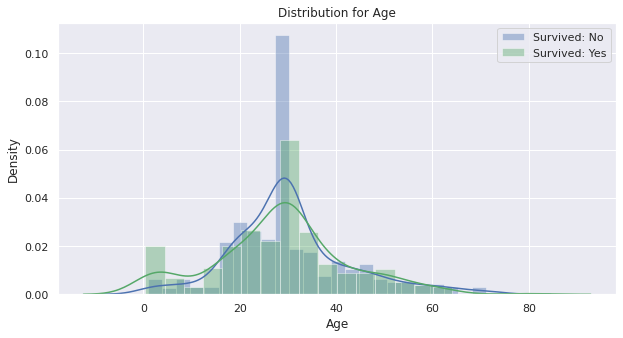

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

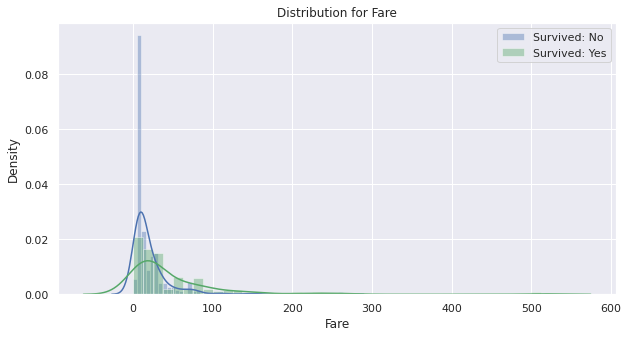

In [ ]:

np.seterr(divide='ignore', invalid='ignore')
def distplot(feature, frame):
    plt.figure(figsize=(10,5))
    plt.title("Distribution for {}".format(feature))
    ax0 = sns.distplot(frame[frame['Survived'] == 0][feature], color= 'b', label='Survived: No')
    ax1 = sns.distplot(frame[frame['Survived'] == 1][feature], color= 'g', label='Survived: Yes')
    plt.legend()
    plt.show()
numerical_cols = ['Age']

#visualize for Age
display(titanic['Age'].describe())
distplot('Age', titanic)
#Here we see that age distribution of both survivors and deceased is very similar but 
#we see that more number of children were able to survive which means, officials made an efforts to save children.
#Also out the people who survived, majority were in the age group of 20 to 40.
#But we also observed that out of the people who didn't survive, were mostly of around the age of 30.



#visualize for Fare
display(titanic['Fare'].describe())
distplot('Fare', titanic)
#Here we see significant difference between plots of survivors and deceased.
#We can observe that people who paid less fare are less likely to survive.
#Hence, we can conclude that Fare is a better factor to one's chance of survival in comparison to Age.




### **Calculate and visualize the survival rate for discrete columns**
- Calculate the survival rate for column _SibSp_ and _Parch_.
- Use sns.barplot to visualize the survival rate for column _SibSp_ and _Parch_.

,SibSp,Parch
,mean,mean
Survived,,
0,0.553734,0.329690
1,0.473684,0.464912


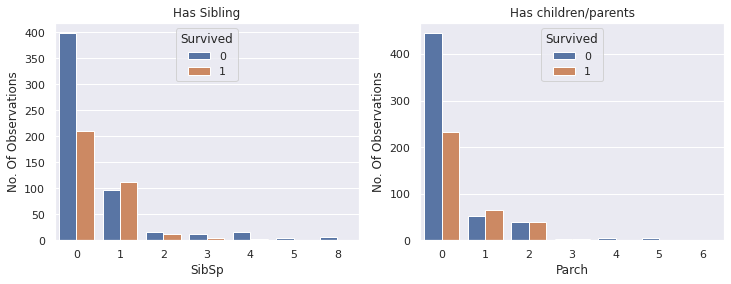

In [ ]:


#Calculating Mean for SibSp and Parch
display(titanic.groupby('Survived').aggregate({
    'SibSp': ['mean'],
    'Parch': ['mean']}).head()
)

#visualisation
#Approach 1
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has Sibling")
axis[1].set_title("Has children/parents")
axis_y = "Survival Rate"
labels = ['Deceased', 'Survived']
# Plot SipSp column
gp_SipSp = titanic.groupby('SibSp')["Survived"].value_counts()/len(titanic)
gp_SipSp = gp_SipSp.to_frame().rename({"Survived": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='SibSp', y= axis_y, hue='Survived', data=gp_SipSp, ax=axis[0])
# Plot Parch column
gp_Parch = titanic.groupby('Parch')["Survived"].value_counts()/len(titanic)
gp_Parch = gp_Parch.to_frame().rename({"Survived": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Parch', y= axis_y, hue='Survived', data=gp_Parch, ax=axis[1])


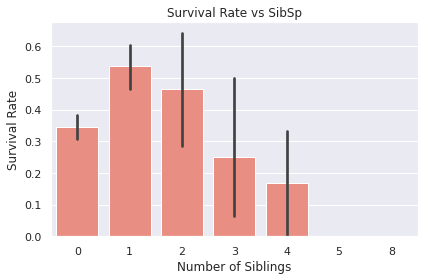

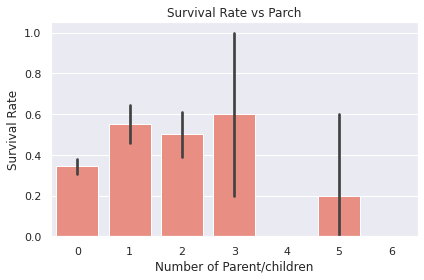

In [ ]:

#Approach 2
ax = sns.barplot(titanic['SibSp'], titanic['Survived'], color="salmon")
plt.xlabel('Number of Siblings')
plt.ylabel('Survival Rate')
#plt.subplot(1,2,2)
ax.set_title('Survival Rate vs SibSp')
plt.tight_layout()
plt.show()

ax1 = sns.barplot(titanic['Parch'], titanic['Survived'], color="salmon")
plt.xlabel('Number of Parent/children')
plt.ylabel('Survival Rate')
ax1.set_title('Survival Rate vs Parch')
plt.tight_layout()
plt.show()


### **Find the correlations.**
Find the correlations between the feature and the target variable _Survived_ and use heatmap to visualize it. Summarize your findings.

In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Survived,1.000000,0.247845,0.543351,0.037025,-0.136302,0.086210,0.191981,0.270495,0.106811
Pclass,0.247845,1.000000,0.118133,0.171190,-0.149630,-0.000343,0.079498,0.187437,-0.168091
Sex,0.543351,0.118133,1.000000,0.005005,-0.046152,0.242417,0.137725,0.082104,0.116569
Age,0.037025,0.171190,0.005005,1.000000,0.010067,0.132659,0.117313,0.163002,-0.133308
SibSp,-0.136302,-0.149630,-0.046152,0.010067,1.000000,0.165255,-0.046556,-0.108709,-0.030683
Parch,0.086210,-0.000343,0.242417,0.132659,0.165255,1.000000,0.074306,-0.002761,-0.085059
Fare,0.191981,0.079498,0.137725,0.117313,-0.046556,0.074306,1.000000,0.379659,0.076726
Cabin,0.270495,0.187437,0.082104,0.163002,-0.108709,-0.002761,0.379659,1.000000,0.017685
Embarked,0.106811,-0.168091,0.116569,-0.133308,-0.030683,-0.085059,0.076726,0.017685,1.000000


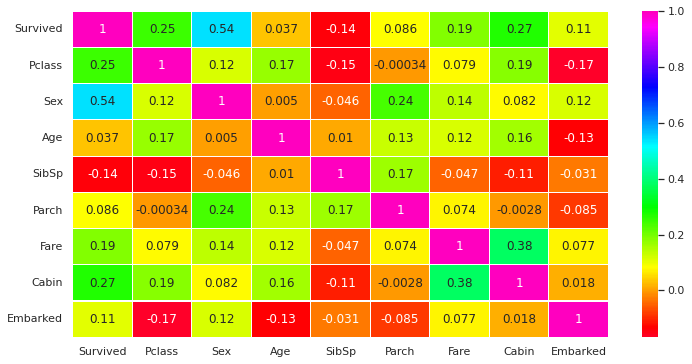

In [ ]:
# Removing columns like Name, PassengerID and Ticket as these factors are independent variables and shouldn't have any effect on Survival rate
plt.figure(figsize=(12, 6))
corr = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked']].apply(lambda x: pd.factorize(x)[0]).corr()
display(corr)
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="gist_rainbow", annot=True)

#We can observe that Sex has a moderate correlation with Survival rate which we also obeserved in Q5,
#followed by Pclass, Cabin and Fare  also have positive correlation with Survival rate but not very high, but we must also notice that
#around 687cabin values were missing out of 891 rows, which we replaced with 'others' which can be misleading in terms of generating correlation.


### **Any other insights do you draw by analyzing the data? Summarize the findings as well as provide the code leading you to the findings.**

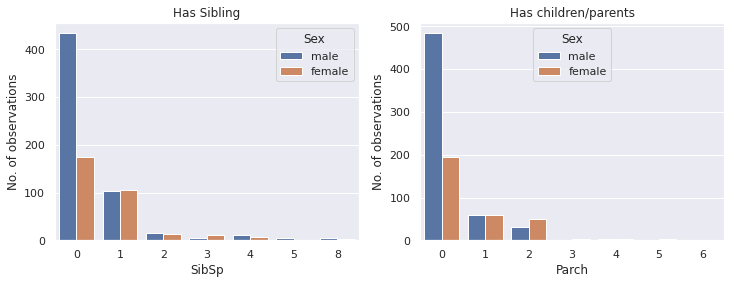

In [ ]:

fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has Sibling")
axis[1].set_title("Has children/parents")
axis_y = "No. of observations"
labels = ['Deceased', 'Survived']
# Plot SipSp column
gp_SipSp = titanic.groupby('SibSp')["Sex"].value_counts()
gp_SipSp = gp_SipSp.to_frame().rename({"Sex": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='SibSp', y= axis_y, hue='Sex', data=gp_SipSp, ax=axis[0])
# Plot Parch column
gp_Parch = titanic.groupby('Parch')["Sex"].value_counts()
gp_Parch = gp_Parch.to_frame().rename({"Sex": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Parch', y= axis_y, hue='Sex', data=gp_Parch, ax=axis[1])


#Here we can conclude that there were more males with 0 sibling/spouse or children/parents
#than females



In [ ]:

#Please find the insights with the pivot tables
from termcolor import colored
#df.pivot_table("Age", index=["Sex", "Survived", "Embarked"],
# columns = ["Pclass"], aggfunc=np.mean, fill_values = 0)
#Fare
print("Here, we built a pivot table for Average Fare and we observed that average \
\nfare of males and females who survived is much higher than who didn't survive ")
display(titanic_new.pivot_table('Fare' ,index=['Sex'], columns= ['Survived'], aggfunc=np.mean))

print("However after we did the comparision on Pclass level (below) there were\
\ninstances where average fare of survivors was less than those who didn't survive.")
display(titanic_new.pivot_table('Fare' ,index=['Pclass', 'Sex'], columns= ['Survived'], aggfunc=np.mean))

print("Further, we observed that in PClass1 Females and Males of Age group 1 to 25 years \
\nwere the major exceptions along with PClass1 Males of Age group 51 to 75 years as a minor exception")
age_bins = pd.cut(x=titanic_new["Age"],bins= [0, 25, 50, 75,100],
             labels=['1 to 25', '26 to 50', '51 to 75',
                            '75 to 100'])
display(titanic_new.pivot_table("Fare", index=['Pclass',"Sex", age_bins], columns ="Survived"))


Here, we built a pivot table for Average Fare and we observed that average 
fare of males and females who survived is much higher than who didn't survive 


Survived,0,1
Sex,,
female,23.024385,51.938573
male,21.960993,40.821484


However after we did the comparision on Pclass level (below) there were
instances where average fare of survivors was less than those who didn't survive.


Survived                0           1
Pclass Sex                           
1      female  110.604167  105.978159
       male     62.894910   74.637320
2      female   18.250000   22.288989
       male     19.488965   21.095100
3      female   19.773093   12.464526
       male     12.204469   15.579696

Further, we observed that in PClass1 Females and Males of Age group 1 to 25 years 
were the major exceptions along with PClass1 Males of Age group 51 to 75 years as a minor exception


Survived                          0           1
Pclass Sex    Age                              
1      female 1 to 25    151.550000  114.290385
              26 to 50    28.712500  107.513302
              51 to 75          NaN   83.213138
       male   1 to 25    137.805943   96.310114
              26 to 50    55.085880   75.235109
              51 to 75    56.145638   42.937500
              75 to 100         NaN   30.000000
2      female 1 to 25     13.000000   25.643604
              26 to 50    21.500000   20.080207
              51 to 75    10.500000   19.500000
       male   1 to 25     24.783654   25.625420
              26 to 50    17.374922   15.310417
              51 to 75    17.352273   10.500000
3      female 1 to 25     18.093622   12.257073
              26 to 50    21.116670   12.720395
              51 to 75          NaN    9.587500
       male   1 to 25     13.520717   11.631880
              26 to 50    11.647890   18.504004
              51 to 75     7.518522         NaN

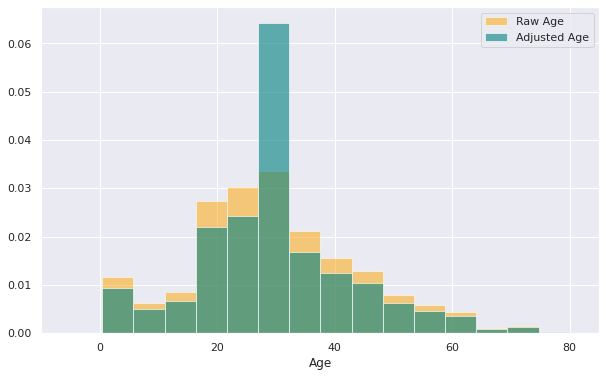

Here we see some discrepancy around the age group 20 to 40 which definitely 
had some influence on the above numbers.Hence we need a better approach for 
dealing with missing Age.


In [ ]:
#As we found such interesting insights from the previous tables, I further wanted to do a 
#comparison of original age data and adjusted age data.

titanic_orig = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')
#visualize original age data and our adjusted data
plt.figure(figsize=(10,6))

ax = titanic_orig["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
ax = titanic["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()
print('Here we see some discrepancy around the age group 20 to 40 which definitely \
\nhad some influence on the above numbers.Hence we need a better approach for \
\ndealing with missing Age.')


In [ ]:

# I further created a pivot table on different ages groups for
#survival rate on different Pclass
print("\nBelow we observed that survival rate of women in Pclass1 and Pclass 2 of \
\nage group 1-25 and 25-50 is very high. Hence we can say that females of all age group in PClass1 \
\n along with females of age group 1-50 had better chance on survival.")

age_bins = pd.cut(x=titanic_new["Age"],bins= [0, 25, 50, 75,100],
             labels=['1 to 25', '26 to 50', '51 to 75',
                            '75 to 100'])
titanic_new.pivot_table("Survived", index=["Sex", age_bins], columns ="Pclass")



Below we observed that survival rate of women in Pclass1 and Pclass 2 of 
age group 1-25 and 25-50 is very high. Hence we can say that females of all age group in PClass1 
 along with females of age group 1-50 had better chance on survival.


Pclass                   1         2         3
Sex    Age                                    
female 1 to 25    0.928571  0.965517  0.507692
       26 to 50   0.981132  0.909091  0.487179
       51 to 75   1.000000  0.666667  1.000000
male   1 to 25    0.500000  0.277778  0.155039
       26 to 50   0.402439  0.100000  0.129187
       51 to 75   0.160000  0.083333  0.000000
       75 to 100  1.000000       NaN       NaN

### **Bonus Point: Build a ML model to predict survival.**
Can you build a logistic regression model to predict the probability of survival for all the passengers in this [file](https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv)? You can evaluate your model accuracy on [Kaggle](https://www.kaggle.com/c/titanic). Can you think of any other ways to improve the model performance? Implement your idea to see if it actually works. 

In [ ]:
# TODO
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns
sns.set()

# evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# grid search for model selection
from sklearn.model_selection import GridSearchCV

# linear regression
from sklearn.linear_model import LinearRegression

# logistic regression
from sklearn.linear_model import LogisticRegression

# decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
train = pd.read_csv("https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv")
test = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv')


In [ ]:
#As the mean of all the passengers was creating a bias
#we now do mean for that particular pclass
def add_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return int(train[train["Pclass"] == Pclass]["Age"].mean())
    else:
        return Age

train["Age"] = train[["Age", "Pclass"]].apply(add_age,axis=1)
test["Age"] = test[["Age", "Pclass"]].apply(add_age,axis=1)

In [ ]:
#Dropping cabin as too many value are missing
train.drop("Cabin",inplace=True,axis=1)
test.drop("Cabin",inplace=True,axis=1)
#replacing embarked with mode
embarked_mode = train['Embarked'].mode()[0]
train['Embarked'] = train['Embarked'].fillna(embarked_mode) #check again
#train.isna().sum()

embarked_mode = test['Embarked'].mode()[0]
test['Embarked'] = test['Embarked'].fillna(embarked_mode) #check again
#dropping rows with null values
test.dropna(inplace=True)
#test.isna().sum()

In [ ]:
#creating 2 separate columns for male and female
pd.get_dummies(train["Sex"])
pd.get_dummies(test["Sex"])

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
413,0,1
414,1,0
415,0,1
416,0,1


In [ ]:
#removing sex column
sex = pd.get_dummies(train["Sex"],drop_first=True)

#adding new columns for Embarked and Pclass and then removing original ones
embarked = pd.get_dummies(train["Embarked"],drop_first=True)
pclass = pd.get_dummies(train["Pclass"],drop_first=True)

#adding all data together
train = pd.concat([train,pclass,sex,embarked],axis=1)

In [ ]:
sex = pd.get_dummies(test["Sex"],drop_first=True)

embarked = pd.get_dummies(test["Embarked"],drop_first=True)
pclass = pd.get_dummies(test["Pclass"],drop_first=True)

test = pd.concat([test,pclass,sex,embarked],axis=1)

In [ ]:
#dropping columns that do no factor in the model
train.drop(["PassengerId","Pclass","Name","Sex","Ticket","Embarked"],axis=1,inplace=True)
test.drop(["PassengerId","Pclass","Name","Sex","Ticket","Embarked"],axis=1,inplace=True)




In [ ]:
#X has all the features, y is target
X_train = train.drop("Survived",axis=1)
y_train = train["Survived"]



In [ ]:
#training model using logistic regression

from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression(solver='lbfgs', max_iter=1000)
logistic_regression_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
#Creating predictions on test data
X_test = test.loc[:,['Age', 'SibSp', 'Parch', 'Fare', 2, 3, 'male', 'Q', 'S']]
y_test = logistic_regression_model.predict(X_test)  # create y-labels through the learned model
print(y_test)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1
 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0
 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0
 1 1 1 1 1 0 1 0 0 0]


In [ ]:
#Testing for accuracy by spliting the dataset

X = train.drop("Survived",axis=1)
y = train["Survived"]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       154
           1       0.82      0.67      0.73       114

    accuracy                           0.79       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.79      0.79       268



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

# True positive: 137 (We predicted a positive result and it was positive)
# True negative: 76 (We predicted a negative result and it was negative)
# False positive: 17 (We predicted a positive result and it was negative)
# False negative: 38 (We predicted a negative result and it was positive)

array([[137,  17],
       [ 38,  76]])